In [1]:
# basics libs
import pandas as pd
import numpy as np

In [2]:
# fetch dataset
df = pd.read_csv('/home/akash/Datasets/avocado_ripeness_dataset.csv')
df.head()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


In [3]:
# EDA & preprocessing
df.describe()

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000


In [4]:
# rows and columns
df.shape

(250, 9)

In [5]:
# missing values
df.isnull().sum()

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64

In [6]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB


In [7]:
# convert categorical values to numerical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['color_category'] = encoder.fit_transform(df['color_category'])
df['ripeness'] = encoder.fit_transform(df['ripeness'])
df.head()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,0,34,175,261,4
1,71.7,53,69,75,2,69,206,185,3
2,88.5,60,94,46,1,79,220,143,2
3,93.8,105,87,41,1,75,299,140,2
4,42.5,303,58,32,3,63,200,227,0


In [8]:
# create X and y
X = df.drop(columns = ['ripeness'], axis = 1)
y = df.ripeness

In [9]:
# shape
print(X.shape)
print(y.shape)

(250, 8)
(250,)


In [10]:
# scale values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.04745763, 0.05487805, 0.14492754, ..., 0.08163265, 0.15646259,
        0.80904523],
       [0.69378531, 0.15853659, 0.56521739, ..., 0.79591837, 0.36734694,
        0.42713568],
       [0.88361582, 0.17987805, 0.92753623, ..., 1.        , 0.46258503,
        0.2160804 ],
       ...,
       [0.04180791, 0.00914634, 0.14492754, ..., 0.14285714, 0.24489796,
        0.87437186],
       [0.57853107, 0.18902439, 0.82608696, ..., 0.71428571, 0.7414966 ,
        0.31155779],
       [0.08474576, 0.07926829, 0.        , ..., 0.20408163, 0.2585034 ,
        0.86432161]], shape=(250, 8))

In [16]:
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)

In [24]:
# model build
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([4, 0, 3, 3, 1, 1, 1, 4, 0, 0, 2, 0, 3, 4, 4, 0, 3, 1, 4, 3, 3, 2,
       4, 3, 2, 2, 4, 4, 0, 3, 2, 0, 0, 4, 4, 0, 2, 4, 3, 2, 0, 1, 3, 2,
       4, 1, 3, 0, 0, 1, 0, 2, 2, 3, 4, 2, 4, 0, 2, 4, 2, 4, 3, 2, 3, 0,
       4, 4, 0, 4, 2, 4, 1, 2, 1])

In [25]:
# model score
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
1.0


In [27]:
# report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        16\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        16\n           3       1.00      1.00      1.00        14\n           4       1.00      1.00      1.00        20\n\n    accuracy                           1.00        75\n   macro avg       1.00      1.00      1.00        75\nweighted avg       1.00      1.00      1.00        75\n'

[Text(0.5, 0.875, 'x[0] <= 0.329\ngini = 0.798\nsamples = 175\nvalue = [34, 41, 34, 36, 30]'),
 Text(0.25, 0.625, 'x[5] <= 0.286\ngini = 0.488\nsamples = 71\nvalue = [0, 41, 0, 0, 30]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 0, 0, 30]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0, 0, 0]'),
 Text(0.75, 0.625, 'x[1] <= 0.591\ngini = 0.666\nsamples = 104\nvalue = [34, 0, 34, 36, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[4] <= 0.5\ngini = 0.5\nsamples = 70\nvalue = [0, 0, 34, 36, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34, 0, 0]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 36, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0, 0, 0]')]

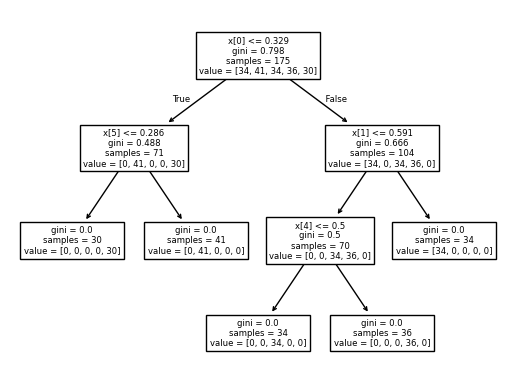

In [28]:
# plot tree
from sklearn.tree import plot_tree
plot_tree(model)

In [30]:
# unseen prediction
model.predict([[93.8, 105, 87, 41, 1, 75, 299, 140]])

array([0])